In [1]:
# load data:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### importe bralibase file to a data frame 



In [2]:
# read Bralibase input that contains several runs of one parameter that was alternated
def read_file_to_df(infile):
    
    #flags:
    set_paramerter = 0
    read_file = 0
    set_header = 0

    sw_parameter = ''
    df_dict ={}


    f = open(infile, 'r') # open the file for reading
    data = []
    for row_num, line in enumerate(f):
        # Remove the new line at the end and then split the string based on
        # tabs. This creates a python list of the values.
        values = line.strip().split('\t')
        # print values

        if values[0] == 'Testing the following parameters:':
            set_paramerter = 1
            continue
        elif set_paramerter == 1:
            # get second part of string e.g. 'struct_cost 0,'
            sw_parameter = values[0].split(' ')[1]
            #print sw_parameter
            sw_parameter = sw_parameter.rstrip(',')
            set_paramerter = 0
            continue
        elif values[0] == '### Begin Objective Function ###':
            read_file = 1
            set_header = 1
            #print 'header'
            continue
        elif read_file ==1:
            if values[0] == '### End Objective Function ###':

                d = dict([(x[0],x[1]) for x in h])
                df = 'df_sw_' + str(sw_parameter)
                df_dict[df] = pd.DataFrame(data=d)
                #print df
                read_file = 0
                continue
            elif set_header == 1:
                h = []
                h = list([(key, []) for key in values])
                #print values
                set_header = 0
            else:
                #print values
                for pos, i in enumerate(values):
                    h[pos][1].append(i)



    f.close() # close the file
    
    return df_dict

In [3]:
# change strings to flote or interger values and add the structure weight as colum
def cast_datatyps_of_df(df, sw_range_list):

    for i in sw_range_list:
        df_name = 'df_sw_' + str(i)
        df[df_name]['PredlocalEndA'] = df[df_name]['PredlocalEndA'].astype(int)
        df[df_name]['PredlocalEndB'] = df[df_name]['PredlocalEndB'].astype(int)
        df[df_name]['PredlocalStartA'] = df[df_name]['PredlocalStartA'].astype(int)
        df[df_name]['PredlocalStartB'] = df[df_name]['PredlocalStartB'].astype(int)
        df[df_name]['sps'] = df[df_name]['sps'].astype(float)
        df[df_name]['spsmax'] = df[df_name]['spsmax'].astype(float)
        df[df_name]['apsi'] = df[df_name]['apsi'].astype(int)
        df[df_name]['sci'] = df[df_name]['sci'].astype(int)
        df[df_name]['score'] = df[df_name]['score'].astype(int)
        df[df_name]['SeqAFp'] = df[df_name]['SeqAFp'].astype(int)
        df[df_name]['SeqATn'] = df[df_name]['SeqATn'].astype(int)
        df[df_name]['SeqATp'] = df[df_name]['SeqATp'].astype(int)
        df[df_name]['SeqAFn'] = df[df_name]['SeqAFn'].astype(int)
        df[df_name]['SeqBFp'] = df[df_name]['SeqBFp'].astype(int)
        df[df_name]['SeqBTn'] = df[df_name]['SeqBTn'].astype(int)
        df[df_name]['SeqBTp'] = df[df_name]['SeqBTp'].astype(int)
        df[df_name]['SeqBFn'] = df[df_name]['SeqBFn'].astype(int)
        df[df_name]['ReflocalEndA'] = df[df_name]['ReflocalEndA'].astype(int)
        df[df_name]['ReflocalEndB'] = df[df_name]['ReflocalEndB'].astype(int)
        df[df_name]['ReflocalStartA'] = df[df_name]['ReflocalStartA'].astype(int)
        df[df_name]['ReflocalStartB'] = df[df_name]['ReflocalStartB'].astype(int)
        df[df_name]['RefsequenceLengthRawA'] = df[df_name]['RefsequenceLengthRawA'].astype(int)
        df[df_name]['RefsequenceLengthRawB'] = df[df_name]['RefsequenceLengthRawB'].astype(int)
        df[df_name]['RefsequenceLengthRefA'] = df[df_name]['RefsequenceLengthRefA'].astype(int)
        df[df_name]['RefsequenceLengthRefB'] = df[df_name]['RefsequenceLengthRefB'].astype(int)
        df[df_name]['sw_range'] = i

    return df

In [4]:
# concatinate dataframes for the different sw (for the average and the compleat data)
def concatinate_dfs(sw_range_list, df_dict):
    scores = []
    max_sps = []
    df_names_list = []
    # construct y
    for i in sw_range_list:
        df_name = 'df_sw_' + str(i)
        df_names_list.append(df_dict[df_name])
        df = df_dict[df_name]
        df_score = df[['score']].apply(pd.to_numeric)
        #print df_score
        #print df_score['score'].mean()
        scores.append(int(df_score['score'].mean()))
        df_max_sps = df[['spsmax']].apply(pd.to_numeric)
        max_sps.append(df_max_sps['spsmax'].mean())

    # see each datatyp of a list
    #for element in scores:
        #print element, type(element)     


    np_sw_range = np.array(sw_range_list)    
    np_scores = np.array(scores)
    np_max_sps = np.array(max_sps)



    d = {'sw_range': sw_range_list, 'scores': scores, 'max_sps': max_sps}
    df_avg_scors = pd.DataFrame(data=d)


    df_full_sw_scores = pd.concat(df_names_list)
    #df_full_sw_scores.info()
    
    return df_full_sw_scores, df_avg_scors

In [5]:
# concatinate a colum of the df and the belonging df sw name
def concatinate_dfs_making_sw_colums(sw_range_list, df_dict, column='score'):
    
    df_colum_sw_name = pd.DataFrame()
    
    # construct y
    for i in sw_range_list:
        df_name = 'df_sw_' + str(i)
        column_name = 'sw_' + str(i)
        #print column_name
        df = df_dict[df_name]
        df_colum_sw_name[column_name] = df[column]
        
    
    return df_colum_sw_name

In [6]:
def select_parts_of_df(df_in, identifier):
    df = pd.concat([df_in['Filename'], df_in['sw_range'], df_in['score'], df_in['PredlocalStartA'], df_in['PredlocalEndA'], df_in['PredlocalStartB'], df_in['PredlocalEndB'], df_in['spsmax']], axis=1, keys=['Filename', 'sw_range', 'score', 'PredlocalStartA', 'PredlocalEndA', 'PredlocalStartB', 'PredlocalEndB', 'spsmax'])
    df['seq'] = identifier
    return df



def generate_one_df(df_full_sw_scores, df_full_sw_scores_shuffled_seq, id_all_shuffeld='shuffled_RNA', id_con_shuffle='unshuffled_RNA'):
    
    df_allseq_unshuffled = select_parts_of_df(df_full_sw_scores, id_con_shuffle)
    df_allseq_shuffled = select_parts_of_df(df_full_sw_scores_shuffled_seq, id_all_shuffeld)
    
    frames = [df_allseq_shuffled, df_allseq_unshuffled]
    df_shuffled_and_unshuffled = pd.concat(frames)
    
    return df_shuffled_and_unshuffled

In [7]:
def create_statisics_df(df_dict, sw_list, sens_spec_sep=True):
    df_plot_sens = pd.DataFrame()
    df_plot_spec = pd.DataFrame()
    df_list = []
    
    for sw in sw_list:
        df_dict_temp =df_dict.loc[df_dict['sw_range'] == sw]
        #df_dict_temp.info()
        df_statisics = df_dict_temp[['SeqATp', 'SeqBTp', 'SeqATn', 'SeqBTn', 'SeqAFp', 'SeqBFp', 'SeqAFn', 'SeqBFn', 'RefsequenceLengthRawA']]
        sens = 'sensitivity_sw_' + str(sw)
        spec = 'specificity_sw_' + str(sw)
        df_plot_sens[sens]= ((df_statisics['SeqATp']/ (df_statisics['SeqATp'] + df_statisics['SeqAFn'])) +(df_statisics['SeqBTp']/ (df_statisics['SeqBTp'] + df_statisics['SeqBFn']))) / 2
        df_plot_spec[spec]= ((df_statisics['SeqATn']/ (df_statisics['SeqATn'] + df_statisics['SeqAFp'])) +(df_statisics['SeqBTn']/ (df_statisics['SeqBTn'] + df_statisics['SeqBFp']))) / 2
        
    return df_plot_sens, df_plot_spec  




In [8]:
# bis zum concat kann man alles zusammen fassen! inklusice ob df in bestimmten range sein soll! 

def generate_dataset(file_name, step_size = 10, start_param = 0, end_param = 400, cut_apsi=100):
    #read file
    df_dict = read_file_to_df(file_name)
    
    # list for different sw datasets 
    end_param = end_param + step_size
    sw_range_list = list(range(start_param,end_param,step_size))
    
    # cast parameters of df
    df_dict = cast_datatyps_of_df(df_dict, sw_range_list)
    
    # concatinate dataframe
    df_full_sw_scores, df_avg_scors = concatinate_dfs(sw_range_list, df_dict)
    
    if (cut_apsi < 100):
        print '< ' + str(cut_apsi)
        df_full_sw_scores = df_full_sw_scores[(df_full_sw_scores.apsi < cut_apsi)]
    
    return df_full_sw_scores, df_avg_scors



### Read data

In [9]:
file_dir = '/home/muellert/Dokumente/locarna_parameteropt/Data/20180326_log_files_con100_with_all_shuffled_and_pen/'
file_test = "/home/muellert/Dokumente/locarna_parameteropt/Data/20180213_log_file_Benchmarkpilot_struc_weight/20180212 1_Locarna Dataset_Bralibase_con100_k2_U6.log"

file_compleat_sw_0_400_pen0 = file_dir + '20180219_Locarna_defaultParam_con100_ModifiedBralibase-k2.log'
file_compleat_sw_0_400_shuffled_seq_pen0 = file_dir + '20180219_Locarna_fullSeqSuffled_defaultParam_con100_ModifiedBralibase-k2.log'

file_compleat_sw_0_400_pen5 = file_dir + '20180323_Locarna Dataset_Bralibase_con100_k2_pen5.log'
file_compleat_sw_0_400_shuffled_seq_pen5 = file_dir + '20180323_Locarna_fullSeqSuffled_defaultParam_con100_ModifiedBralibase-k2_pen5.log'

file_compleat_sw_0_400_pen15 = file_dir + '20180403_Locarna_Dataset_Bralibase_con100_k2_pen15.log'
file_compleat_sw_0_400_shuffled_seq_pen15 = file_dir + '20180322_Locarna_fullSeqSuffled_defaultParam_con100_ModifiedBralibase-k2_pen15.log'

file_compleat_sw_0_400_pen50 = file_dir + '20180404_Locarna_Dataset_defaultParam_Bralibase_con100_k2_pen50.log'
file_compleat_sw_0_400_shuffled_seq_pen50 = file_dir + '20180406_Locarna_fullSeqSuffled_defaultParam_con100_ModifiedBralibase-k2_pen50.log'

In [10]:
# define dataset

cut_apsi_value = 100;

if cut_apsi_value < 100:
    plot_title = 'BraliBase filterd APSI < ' + str(cut_apsi_value)
elif cut_apsi_value == 100:
    plot_title = 'Full BraliBase' 
else:
    print 'error: apsi sould be between 20 to 100'

### call function to construct df

In [11]:
df_full_sw_scores_pen0, df_avg_scors_pen0 = generate_dataset(file_compleat_sw_0_400_pen0, cut_apsi=cut_apsi_value)
print 'pen0'
df_full_sw_scores_fullshuffled_pen0, df_avg_scors_fullshuffled_pen0 = generate_dataset(file_compleat_sw_0_400_shuffled_seq_pen0, cut_apsi=cut_apsi_value)
print 'pen0_suffled'
df_full_sw_scores_pen5, df_avg_scors_pen5 = generate_dataset(file_compleat_sw_0_400_pen5, cut_apsi=cut_apsi_value)
print 'pen5'
df_full_sw_scores_fullshuffled_pen5, df_avg_scors_fullshuffled_pen5 = generate_dataset(file_compleat_sw_0_400_shuffled_seq_pen5, cut_apsi=cut_apsi_value)
print 'pen5_shuffled'
df_full_sw_scores_pen15, df_avg_scors_pen15 = generate_dataset(file_compleat_sw_0_400_pen15, cut_apsi=cut_apsi_value)
print 'pen15'
df_full_sw_scores_fullshuffled_pen15, df_avg_scors_fullshuffled_pen15 = generate_dataset(file_compleat_sw_0_400_shuffled_seq_pen15, cut_apsi=cut_apsi_value)
print 'pen15_shuffled'

df_full_sw_scores_pen50, df_avg_scors_pen50 = generate_dataset(file_compleat_sw_0_400_pen50, cut_apsi=cut_apsi_value)
print 'pen50'
df_full_sw_scores_fullshuffled_pen50, df_avg_scors_fullshuffled_pen50 = generate_dataset(file_compleat_sw_0_400_shuffled_seq_pen50, cut_apsi=cut_apsi_value)
print 'pen50_shuffled'

pen0
pen0_suffled
pen5
pen5_shuffled
pen15
pen15_shuffled
pen50
pen50_shuffled


In [12]:
# for testing differnce 
# df_full_sw_scores_pen0, df_avg_scors_pen0

def get_difference(df_full_sw_scores, df_full_sw_scores_shuffled_seq):
    df_difference = pd.DataFrame()
    df_rna = df_full_sw_scores.groupby('sw_range')['score'].agg(['min','max','mean'])
    df_shuffled = df_full_sw_scores_shuffled_seq.groupby('sw_range')['score'].agg(['min','max','mean'])
    df_difference['mean_rna'] = df_rna['mean']
    df_difference['mean_shuffeled'] = df_shuffled['mean']
    df_difference['difference'] = df_rna['mean'] - df_shuffled['mean']
    return df_difference

df_difference_pen0 = get_difference(df_full_sw_scores_pen0, df_full_sw_scores_fullshuffled_pen0)

In [13]:
df_shuffled_and_unshuffled_pen0 = generate_one_df(df_full_sw_scores_pen0, df_full_sw_scores_fullshuffled_pen0, id_all_shuffeld='shuffled_RNA_pen0', id_con_shuffle='unshuffled_RNA_pen0')
df_shuffled_and_unshuffled_pen5 = generate_one_df(df_full_sw_scores_pen5, df_full_sw_scores_fullshuffled_pen5, id_all_shuffeld='shuffled_RNA_pen5', id_con_shuffle='unshuffled_RNA_pen5')
df_shuffled_and_unshuffled_pen15 = generate_one_df(df_full_sw_scores_pen15, df_full_sw_scores_fullshuffled_pen15, id_all_shuffeld='shuffled_RNA_pen15', id_con_shuffle='unshuffled_RNA_pen15')
df_shuffled_and_unshuffled_pen50 = generate_one_df(df_full_sw_scores_pen50, df_full_sw_scores_fullshuffled_pen50, id_all_shuffeld='shuffled_RNA_pen50', id_con_shuffle='unshuffled_RNA_pen50')


frames = [df_shuffled_and_unshuffled_pen0, df_shuffled_and_unshuffled_pen5, df_shuffled_and_unshuffled_pen15, df_shuffled_and_unshuffled_pen50]
df_shuffled_and_unshuffled = pd.concat(frames)

df_shuffled_and_unshuffled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037044 entries, 0 to 6225
Data columns (total 9 columns):
Filename           object
sw_range           int64
score              int64
PredlocalStartA    int64
PredlocalEndA      int64
PredlocalStartB    int64
PredlocalEndB      int64
spsmax             float64
seq                object
dtypes: float64(1), int64(6), object(2)
memory usage: 155.4+ MB


In [14]:
assert((len(df_full_sw_scores_pen0)+len(df_full_sw_scores_fullshuffled_pen0)) == len( df_shuffled_and_unshuffled_pen0))
print len(df_full_sw_scores_pen0)
print len(df_full_sw_scores_fullshuffled_pen0)
print len( df_shuffled_and_unshuffled_pen0)

255266
253995
509261


In [15]:
# calculate alignemnt lenth

#df_shuffled_and_unshuffled['ReflocalStartB']
df_shuffled_and_unshuffled['alig_length'] = ((df_shuffled_and_unshuffled['PredlocalEndA'] - df_shuffled_and_unshuffled['PredlocalStartA']+1) + (df_shuffled_and_unshuffled['PredlocalEndB'] - df_shuffled_and_unshuffled['PredlocalStartB']+1)) / 2
df_shuffled_and_unshuffled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037044 entries, 0 to 6225
Data columns (total 10 columns):
Filename           object
sw_range           int64
score              int64
PredlocalStartA    int64
PredlocalEndA      int64
PredlocalStartB    int64
PredlocalEndB      int64
spsmax             float64
seq                object
alig_length        float64
dtypes: float64(2), int64(6), object(2)
memory usage: 171.0+ MB


In [16]:
#df_shuffled_and_unshuffled.groupby('Filename').score.agg(['min','max'])
#df_shuffled_and_unshuffled.groupby('Filename')['seq'].agg(['min','max'])
df = df_shuffled_and_unshuffled.groupby(['seq','sw_range'])['alig_length'].agg(['min','mean'])
#df['sw_range' == 400 & 'seq' == 'shuffled_RNA']
df.query('sw_range == [0,200,400]')
#df_agg = df_shuffled_and_unshuffled.groupby('Filename')['ReflocalStartA'].agg(['min','max'])
#df_agg[df_agg['min']!=df_agg['max']]
#df_full_sw_scores, df_full_sw_scores_shuffled_seq
# can not group by file name because the path is different!!!!!!
#df_shuffled_and_unshuffled.groupby(['Filename']).get_group('/scratch/bi01/miladim/Teresa/Bralibase-LocalAlignment/ModifiedBraliBase_all_shuffel_con100/AllSeqShuffled/k2/5S_rRNA/5S_rRNA.apsi-39.sci-103.no-1.raw.fa')
# apply(lambda x: print(x.max() - x.min()))

min        mean
seq                  sw_range                  
shuffled_RNA_pen0    0          6.0   22.242938
                     200       10.0   66.467070
                     400       19.0  145.815819
shuffled_RNA_pen15   0          5.0   12.163761
                     200        7.0   29.467393
                     400       12.0  103.610896
shuffled_RNA_pen5    0          5.0   17.358838
                     200        8.0   48.615658
                     400       15.0  133.960371
shuffled_RNA_pen50   0          3.0    7.224697
                     200        3.0   10.403874
                     400        7.0   33.441001
unshuffled_RNA_pen0  0          7.0   70.122952
                     200       16.0  112.939929
                     400       49.5  228.608898
unshuffled_RNA_pen15 0          6.0   58.294491
                     200       10.0   73.475747
                     400       16.0  170.734661
unshuffled_RNA_pen5  0          7.0   65.021282
                     200       12.0   92.243254
                     400       28.0  212.502329
unshuffled_RNA_pen50 0          4.0   35.073964
                     200        5.0   48.962094
                     400       10.0   72.526662

In [25]:
no_ticks = 5

ticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
len_ticks = len(ticks)
split = len_ticks/no_ticks

for i, tick in enumerate(ticks): 
    if (i%no_ticks) != 0 :
        ticks[i] = ""
print ticks        

[0, '', '', '', '', 5, '', '', '', '', 10, '', '', '', '', 15, '', '', '', '', 20]


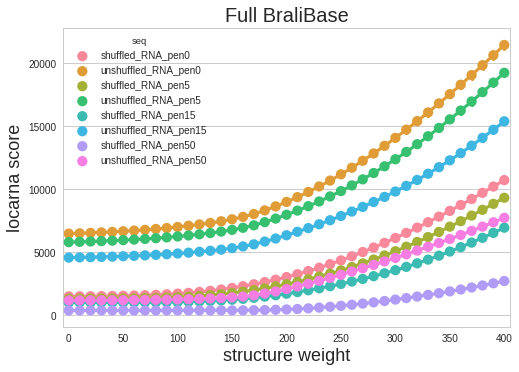

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
#sns.set_context("paper")
#fig = plt.figure(figsize=(6,5))
#ax = fig.gca()# define axis
fig, ax = plt.subplots()

#major_ticks = np.arange(0, 401, 10)
#minor_ticks = np.arange(0, 401, 5)

#ax.set_xticks(major_ticks)
#ax.set_xticks(minor_ticks, minor=True)


sns.pointplot(x="sw_range", y="score", hue="seq", data=df_shuffled_and_unshuffled, ax=ax, alpha =1)


# get number of tick labels you want to have

labels = [item.get_text() for item in ax.get_xticklabels()]
no_ticks = 5

len_ticks = len(labels)
split = len_ticks/no_ticks

for i, tick in enumerate(labels): 
    if (i%no_ticks) != 0 :
        labels[i] = ""
#print labels 

ax.set_xticklabels(labels)

#ax.set_title('Comparison of LocARNA alignemnt score using Bralibase with context 100', fontsize=18)
ax.set_title(plot_title, fontsize=20)
#ax.set_title('Full BraliBase', fontsize=20)
ax.set_xlabel('structure weight', fontsize=18)
ax.set_ylabel('locarna score', fontsize=18)


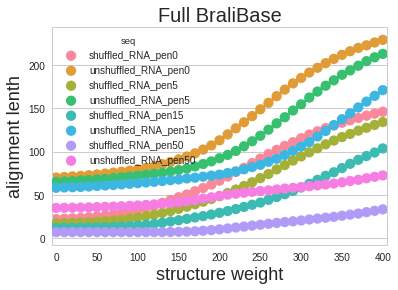

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
fig, ax = plt.subplots()



sns.pointplot(x="sw_range", y="alig_length", hue="seq", data=df_shuffled_and_unshuffled, ax=ax, alpha =1)



# get number of tick labels you want to have

labels = [item.get_text() for item in ax.get_xticklabels()]
no_ticks = 5

len_ticks = len(labels)
split = len_ticks/no_ticks

for i, tick in enumerate(labels): 
    if (i%no_ticks) != 0 :
        labels[i] = ""
#print labels 

ax.set_xticklabels(labels)



ax.set_title(plot_title, fontsize=20)
#ax.set_title('Full BraliBase', fontsize=20)
ax.set_xlabel('structure weight', fontsize=18)
ax.set_ylabel('alignment lenth', fontsize=18)


In [ ]:
sw_list = [10, 50,100,150,200,250,350] 
df_plot_sens, df_plot_spec = create_statisics_df(df_full_sw_scores_pen15, sw_list)
#df_plot, df_emty = create_statisics_df(df_dict, sw_list, False)

In [ ]:
import joypy
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm

%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.gca()# define axis
fig, axes = joypy.joyplot(df_plot_sens, ax=ax)

#ax.set_title('Locarna scors for different structure weights')
#ax.set_xlabel('structure weight')
#ax.set_ylabel('locarna score')
#fig.suptitle('Distriburtion of sensitivity (RNA)', fontsize=18)
#fig.suptitle('BraliBase filterd APSI < 70', fontsize=20)
fig.suptitle(plot_title, fontsize=20)

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.gca()# define axis
fig, axes = joypy.joyplot(df_plot_spec, ax=ax)

#ax.set_title('Locarna scors for different structure weights')
#ax.set_xlabel('structure weight')
#ax.set_ylabel('locarna score')
#fig.suptitle('Distriburtion of specificity (context)', fontsize=18)
#fig.suptitle('BraliBase filterd APSI < 70', fontsize=20)
fig.suptitle(plot_title, fontsize=20)

In [ ]:
df_plot_sens_neu = pd.DataFrame()
df_plot_spec_neu = pd.DataFrame()

df_plot_sens_sw350_pen50, df_plot_spec_sw350_pen50 = create_statisics_df(df_full_sw_scores_pen50, [350])

df_plot_sens_neu['sw350_pen50'] = df_plot_sens_sw350_pen50['sensitivity_sw_350']
df_plot_spec_neu['sw350_pen50'] = df_plot_spec_sw350_pen50['specificity_sw_350']

df_plot_sens_sw350_pen15, df_plot_spec_sw350_pen15 = create_statisics_df(df_full_sw_scores_pen15, [350])

df_plot_sens_neu['sw350_pen15'] = df_plot_sens_sw350_pen15['sensitivity_sw_350']
df_plot_spec_neu['sw350_pen15'] = df_plot_spec_sw350_pen15['specificity_sw_350']

df_plot_sens_sw350_pen5, df_plot_spec_sw350_pen5 = create_statisics_df(df_full_sw_scores_pen5, [350])

df_plot_sens_neu['sw350_pen5'] = df_plot_sens_sw350_pen5['sensitivity_sw_350']
df_plot_spec_neu['sw350_pen5'] = df_plot_spec_sw350_pen5['specificity_sw_350']

df_plot_sens_sw350_pen0, df_plot_spec_sw350_pen0 = create_statisics_df(df_full_sw_scores_pen0, [350])

df_plot_sens_neu['sw350_pen0'] = df_plot_sens_sw350_pen0['sensitivity_sw_350']
df_plot_spec_neu['sw350_pen0'] = df_plot_spec_sw350_pen0['specificity_sw_350']

df_plot_sens_sw200_pen50, df_plot_spec_sw200_pen50 = create_statisics_df(df_full_sw_scores_pen50, [200])

df_plot_sens_neu['sw200_pen50'] = df_plot_sens_sw200_pen50['sensitivity_sw_200']
df_plot_spec_neu['sw200_pen50'] = df_plot_spec_sw200_pen50['specificity_sw_200']

df_plot_sens_sw200_pen15, df_plot_spec_sw200_pen15 = create_statisics_df(df_full_sw_scores_pen15, [200])

df_plot_sens_neu['sw200_pen15'] = df_plot_sens_sw200_pen15['sensitivity_sw_200']
df_plot_spec_neu['sw200_pen15'] = df_plot_spec_sw200_pen15['specificity_sw_200']

df_plot_sens_sw200_pen5, df_plot_spec_sw200_pen5 = create_statisics_df(df_full_sw_scores_pen5, [200])

df_plot_sens_neu['sw200_pen5'] = df_plot_sens_sw200_pen5['sensitivity_sw_200']
df_plot_spec_neu['sw200_pen5'] = df_plot_spec_sw200_pen5['specificity_sw_200']

df_plot_sens_sw200_pen0, df_plot_spec_sw200_pen0 = create_statisics_df(df_full_sw_scores_pen0, [200])

df_plot_sens_neu['sw200_pen0'] = df_plot_sens_sw200_pen0['sensitivity_sw_200']
df_plot_spec_neu['sw200_pen0'] = df_plot_spec_sw200_pen0['specificity_sw_200']

df_plot_sens_sw100_pen50, df_plot_spec_sw100_pen50 = create_statisics_df(df_full_sw_scores_pen50, [100])

df_plot_sens_neu['sw100_pen50'] = df_plot_sens_sw100_pen50['sensitivity_sw_100']
df_plot_spec_neu['sw100_pen50'] = df_plot_spec_sw100_pen50['specificity_sw_100']


df_plot_sens_sw100_pen15, df_plot_spec_sw100_pen15 = create_statisics_df(df_full_sw_scores_pen15, [100])

df_plot_sens_neu['sw100_pen15'] = df_plot_sens_sw100_pen15['sensitivity_sw_100']
df_plot_spec_neu['sw100_pen15'] = df_plot_spec_sw100_pen15['specificity_sw_100']

df_plot_sens_sw100_pen5, df_plot_spec_sw100_pen5 = create_statisics_df(df_full_sw_scores_pen5, [100])

df_plot_sens_neu['sw100_pen5'] = df_plot_sens_sw100_pen5['sensitivity_sw_100']
df_plot_spec_neu['sw100_pen5'] = df_plot_spec_sw100_pen5['specificity_sw_100']

df_plot_sens_sw100_pen0, df_plot_spec_sw100_pen0 = create_statisics_df(df_full_sw_scores_pen0, [100])

df_plot_sens_neu['sw100_pen0'] = df_plot_sens_sw100_pen0['sensitivity_sw_100']
df_plot_spec_neu['sw100_pen0'] = df_plot_spec_sw100_pen0['specificity_sw_100']


df_plot_sens_sw50_pen15, df_plot_spec_sw50_pen15 = create_statisics_df(df_full_sw_scores_pen15, [50])

df_plot_sens_neu['sw50_pen15'] = df_plot_sens_sw50_pen15['sensitivity_sw_50']
df_plot_spec_neu['sw50_pen15'] = df_plot_spec_sw50_pen15['specificity_sw_50']

df_plot_sens_sw50_pen5, df_plot_spec_sw50_pen5 = create_statisics_df(df_full_sw_scores_pen5, [50])

df_plot_sens_neu['sw50_pen5'] = df_plot_sens_sw50_pen5['sensitivity_sw_50']
df_plot_spec_neu['sw50_pen5'] = df_plot_spec_sw50_pen5['specificity_sw_50']

df_plot_sens_sw50_pen0, df_plot_spec_sw50_pen0 = create_statisics_df(df_full_sw_scores_pen0, [50])

df_plot_sens_neu['sw50_pen0'] = df_plot_sens_sw50_pen0['sensitivity_sw_50']
df_plot_spec_neu['sw50_pen0'] = df_plot_spec_sw50_pen0['specificity_sw_50']







df_plot_spec_neu.info()

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.gca()# define axis
fig, axes = joypy.joyplot(df_plot_sens_neu, ax=ax)

#ax.set_title('Locarna scors for different structure weights')
#ax.set_xlabel('structure weight')
#ax.set_ylabel('locarna score')
#fig.suptitle('Distriburtion of specificity (context)', fontsize=18)
#fig.suptitle('BraliBase filterd APSI < 70', fontsize=20)
fig.suptitle(plot_title, fontsize=20)

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(10,8))
ax = fig.gca()# define axis
fig, axes = joypy.joyplot(df_plot_spec_neu, ax=ax)

#ax.set_title('Locarna scors for different structure weights')
#ax.set_xlabel('structure weight')
#ax.set_ylabel('locarna score')
#fig.suptitle('Distriburtion of specificity (context)', fontsize=18)
#fig.suptitle('BraliBase filterd APSI < 70', fontsize=20)
fig.suptitle('Full BraliBase', fontsize=20)

In [ ]:
sw_list = ['10','100','150','200','250','350']
df_plot_sens, df_plot_spec = create_statisics_df(df_dict_shuffled_seq, sw_list)
df_plot, df_emty = create_statisics_df(df_dict_shuffled_seq, sw_list, False)

In [ ]:
%matplotlib inline
#fig = plt.figure(figsize=(10,8))
#ax = fig.gca()# define axis
fig, axes = joypy.joyplot(df_plot_sens)

#ax.set_title('Locarna scors for different structure weights')
#ax.set_xlabel('structure weight')
#ax.set_ylabel('locarna score')
fig.suptitle('Distriburtion of sensitivity (RNA)')

In [ ]:
%matplotlib inline
#fig = plt.figure(figsize=(10,8))
#ax = fig.gca()# define axis
fig, axes = joypy.joyplot(df_plot_spec)

#ax.set_title('Locarna scors for different structure weights')
#ax.set_xlabel('structure weight')
#ax.set_ylabel('locarna score')
fig.suptitle('Distriburtion of specificity (context)')